## The art of detecting patterns: Identify the presence of squares (of arbitrary size) in a picture

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.set_printoptions(threshold=300)

### Load the image

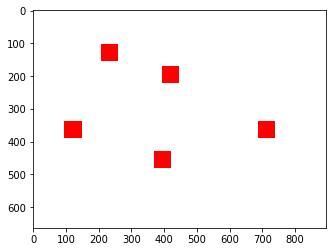

In [2]:
imagePath = '/home/srini/Documents/CMU/AI4ALL/images2/'
square = np.array(Image.open(imagePath + 'squares2.png'))
plt.imshow(square)

### Plot the R, G and the B channels separately

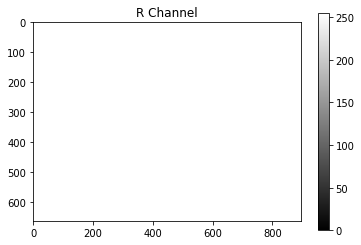

In [3]:
plt.title('R Channel')
plt.imshow(square[:,:,0], cmap='gray', vmin=0, vmax=255)
plt.colorbar()

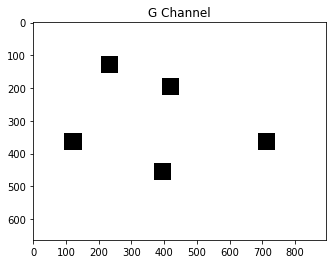

In [4]:
plt.title('G Channel')
plt.imshow(square[:,:,1], cmap='gray')

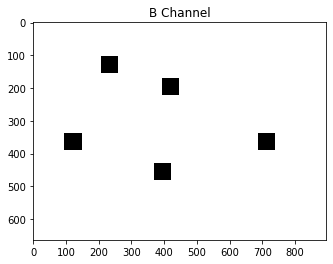

In [5]:
plt.title('B Channel')
plt.imshow(square[:,:,2], cmap='gray')

### For our basic challenge, we don't need the color channels. So let's convert it into grayscale

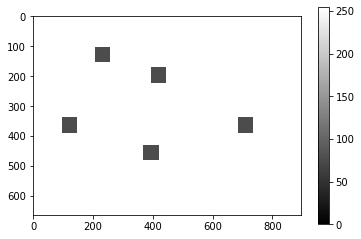

In [6]:
gray = 0.2989 * square[:,:,0] + 0.5870 * square[:,:,1] + 0.1140 * square[:,:,2]
plt.imshow(gray, cmap='gray', vmin=0)
plt.colorbar()

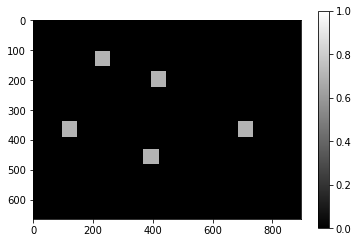

In [7]:
inverted = (1.0 - gray/gray.max())
plt.imshow(inverted, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

### Let's work with a smaller example for now

In [8]:
small_inverted = inverted[250:450, 0:200]

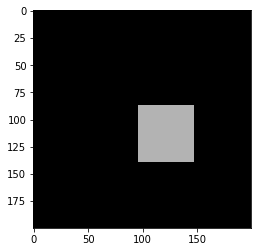

In [9]:
plt.imshow(small_inverted, cmap='gray', vmin=0, vmax=1)

### Alright cool, you have everything setup! Now, how do we tackle the actual problem?

### Given size of square: 52 x 52. Recall that the filter resembles what you're searching for: a white square with a black surrounding. Question: Why do we set the surrounding to a large negative value? 

In [10]:
square_filter = np.ones((53, 53))

In [11]:
square_filter[:,0] = -15
square_filter[:,-1] = -15
square_filter[0, :] = -15
square_filter[-1, :] = -15

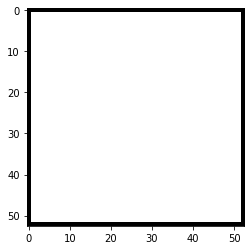

In [12]:
plt.imshow(square_filter, cmap='gray', vmin=-15, vmax=1)

### Exercise: try commenting out the large negative values, see what happens

### Why do I want all this fancy convolution stuff? Why not just search directly (equating the expected value with a sliding window over the image)? 

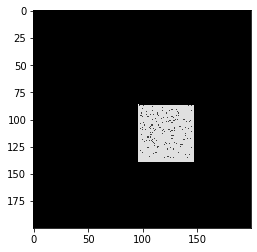

In [13]:
inverted_noised = inverted.copy()
inverted_noised[336, 96] = 0.8
for i in range(150):
    x,y = np.random.randint(low=1, high=50), np.random.randint(low=1, high=50)
    inverted_noised[336 + x, 96 + y] = 0.2
small_inverted_noised = inverted_noised[250:450, 0:200]
plt.imshow(small_inverted_noised, cmap='gray')

### Question: What would happen if you used an exact-matching code on the above image?

### The real world is *noisy*. Smudges from camera, dust and dirt covering the object, effect of lighting, all create *imperfections*. So exact matches are too strict a condition. The square in the image above might have some dirt covering a bit of it, but it should still be counted.

In [14]:
output = signal.convolve2d(small_inverted, square_filter, mode='valid')
output2 = signal.convolve2d(small_inverted_noised, square_filter, mode='valid')

### Convolutions, when set with the right filter values, gives us a *confidence* value that the filter pattern exists in that location. High value: High confidence. Low value: Low confidence. Then we can set a cut-off value, based on how lenient we want to be. Any location above that threshold: contains the patten 

### Play around with the confidence threshold and see what happens to the imperfect square.

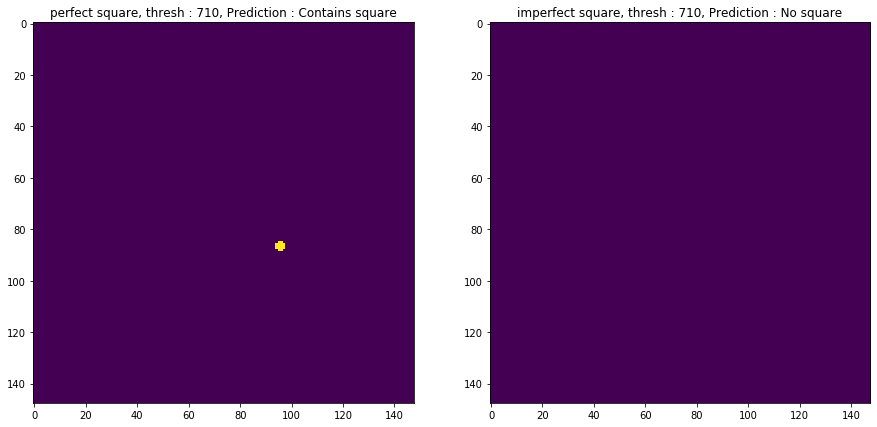

In [15]:
confidence_thresh = 710
vis1 = (output > confidence_thresh)
vis2 = (output2 > confidence_thresh)
prediction = 'Contains square' if vis1.any() else 'No square'
prediction2 = 'Contains square' if vis2.any() else 'No square'

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1)
ax1.title.set_text('perfect square, thresh : {}, Prediction : {}'.format(confidence_thresh, prediction))
plt.imshow(vis1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text('imperfect square, thresh : {}, Prediction : {}'.format(confidence_thresh, prediction2))
plt.imshow(vis2)

### Excersise: Load the triangles image instead of the square and run the above pipeline, see what prediction you get. The steps are given below.

In [16]:
#Load the triangle image

#Convert to grayscale

#Convolve using the square filter provided

#See what happens if you use the same confidence value above as a threshold

### So far, we've used exact size of the pattern. But we usually don't know the size. We should try detecting something size-invariant: like corners. So first we convert the filled in square to edges

In [17]:
sobel_filter_vertical = np.array([[-1, 0, 1], 
                                 [-2, 0, 2], 
                                 [-1, 0, 1]])

In [18]:
sobel_filter_horizontal = np.array([[1, 2, 1], 
                                    [0, 0, 0], 
                                    [-1,-2,-1]])

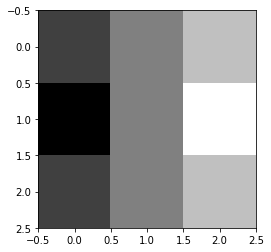

In [19]:
plt.imshow(sobel_filter_vertical, cmap='gray')

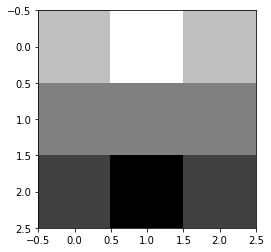

In [20]:
plt.imshow(sobel_filter_horizontal, cmap='gray')

In [21]:
output = signal.convolve2d(small_inverted, sobel_filter_vertical, mode='valid')
output2 = signal.convolve2d(small_inverted, sobel_filter_horizontal, mode='valid')

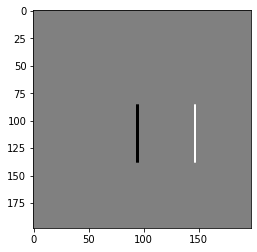

In [22]:
plt.imshow(output, cmap='gray', vmin=-1, vmax=1)

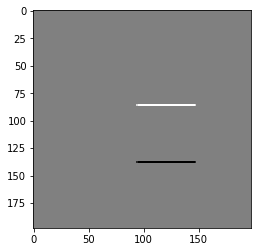

In [23]:
plt.imshow(output2, cmap='gray', vmin=-1, vmax=1)

In [1]:
#Excersise: Design filters to detect the other direction of edges (white to black). Hint: Try to emulate the
#filters above, but in the reverse direction.

horizontal_filter_inverted = 
vertical_filter_inverted = 

#Convolve the filters over the image, as in the previous cells

output3 = signal.convolve2d(small_inverted, , mode='valid')
output4 = signal.convolve2d(small_inverted, , mode='valid')

#Visualize the outputs as in the previous cells.

In [ ]:
#Set a confidence threshold
confidence_thresh = 0

#In each of output, output2, output3 and output4, we 


## It's all about compositions: 
Edges -> Basic Shapes -> Complex Shapes -> Faces/Dogs/Cats/Crop Weeds, etc.

### Rectange = 4 corner shapes
### Triangle = 3 angles

In [ ]:
#Combine the results from each of the 